In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="Set2"
)

plt.rcParams["figure.figsize"] = (14, 7)


In [59]:
df = pd.read_csv("Training.csv")


In [60]:
df.head()
df.shape

(4920, 133)

In [61]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fungal infection
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [62]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fungal infection
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [63]:
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum()/len(df))*100
pd.DataFrame({"Missing": missing_values, "Percent": missing_percent})


,Missing,Percent
itching,0,0.0
skin_rash,0,0.0
nodal_skin_eruptions,0,0.0
continuous_sneezing,0,0.0
shivering,0,0.0
...,...,...
inflammatory_nails,0,0.0
blister,0,0.0
red_sore_around_nose,0,0.0
yellow_crust_ooze,0,0.0


In [64]:
num_cols = df.select_dtypes(include=np.number).columns
imputer_num = SimpleImputer(strategy="mean")
df[num_cols] = imputer_num.fit_transform(df[num_cols])


In [65]:
cat_cols = df.select_dtypes(include="object").columns
imputer_cat = SimpleImputer(strategy="most_frequent")
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])


In [66]:
le = LabelEncoder()
for col in cat_cols:
    if df[col].nunique() == 2:
        df[col] = le.fit_transform(df[col])


In [67]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


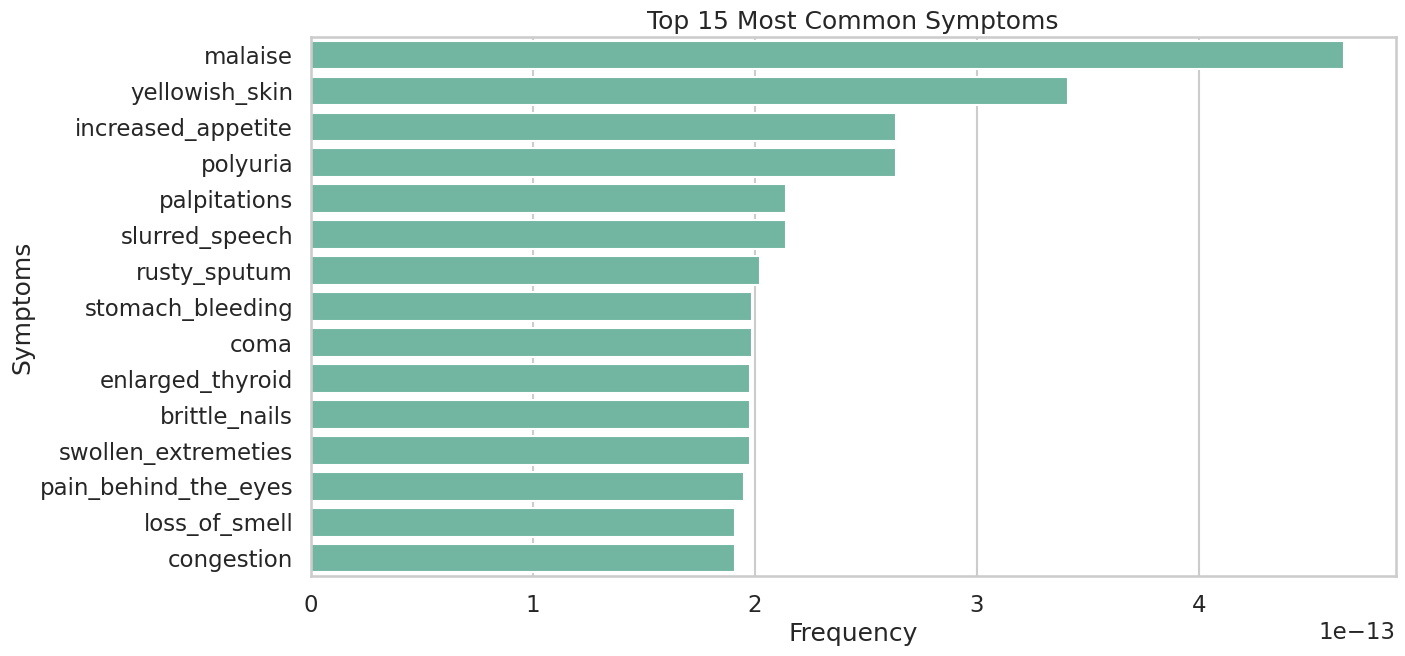

In [68]:
symptoms = df.drop("prognosis", axis=1)
top_symptoms = symptoms.sum().sort_values(ascending=False).head(15)

plt.figure()
sns.barplot(x=top_symptoms.values, y=top_symptoms.index)
plt.title("Top 15 Most Common Symptoms")
plt.xlabel("Frequency")
plt.ylabel("Symptoms")
plt.show()


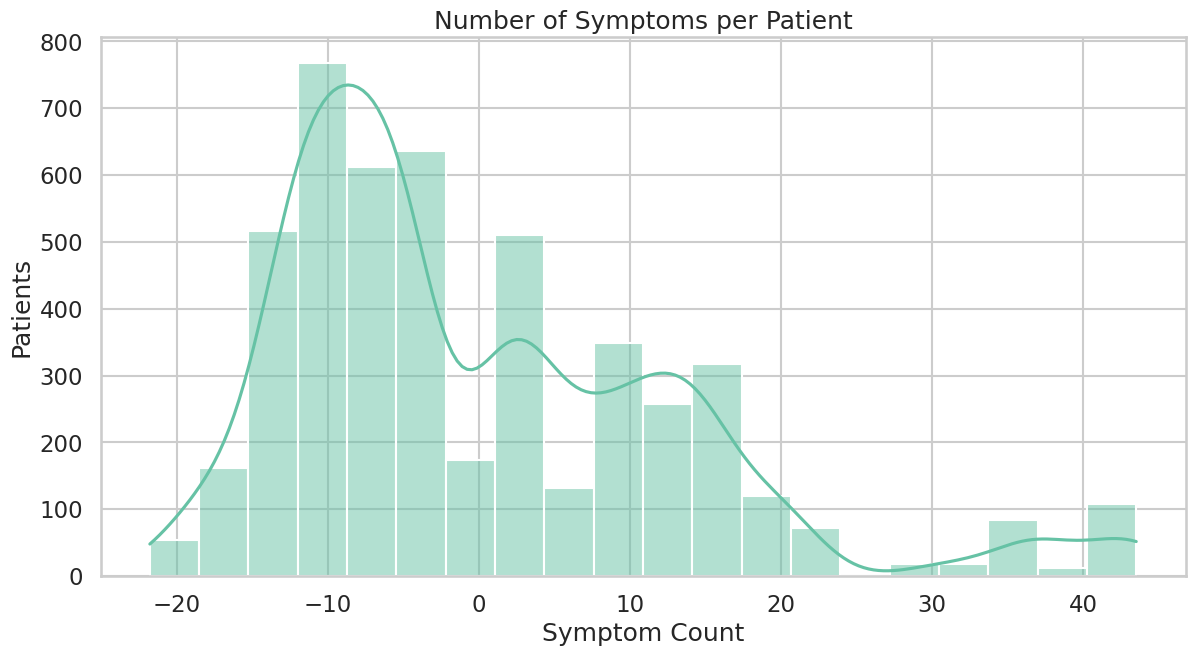

In [69]:
symptom_count = symptoms.sum(axis=1)

plt.figure()
sns.histplot(symptom_count, bins=20, kde=True)
plt.title("Number of Symptoms per Patient")
plt.xlabel("Symptom Count")
plt.ylabel("Patients")
plt.show()


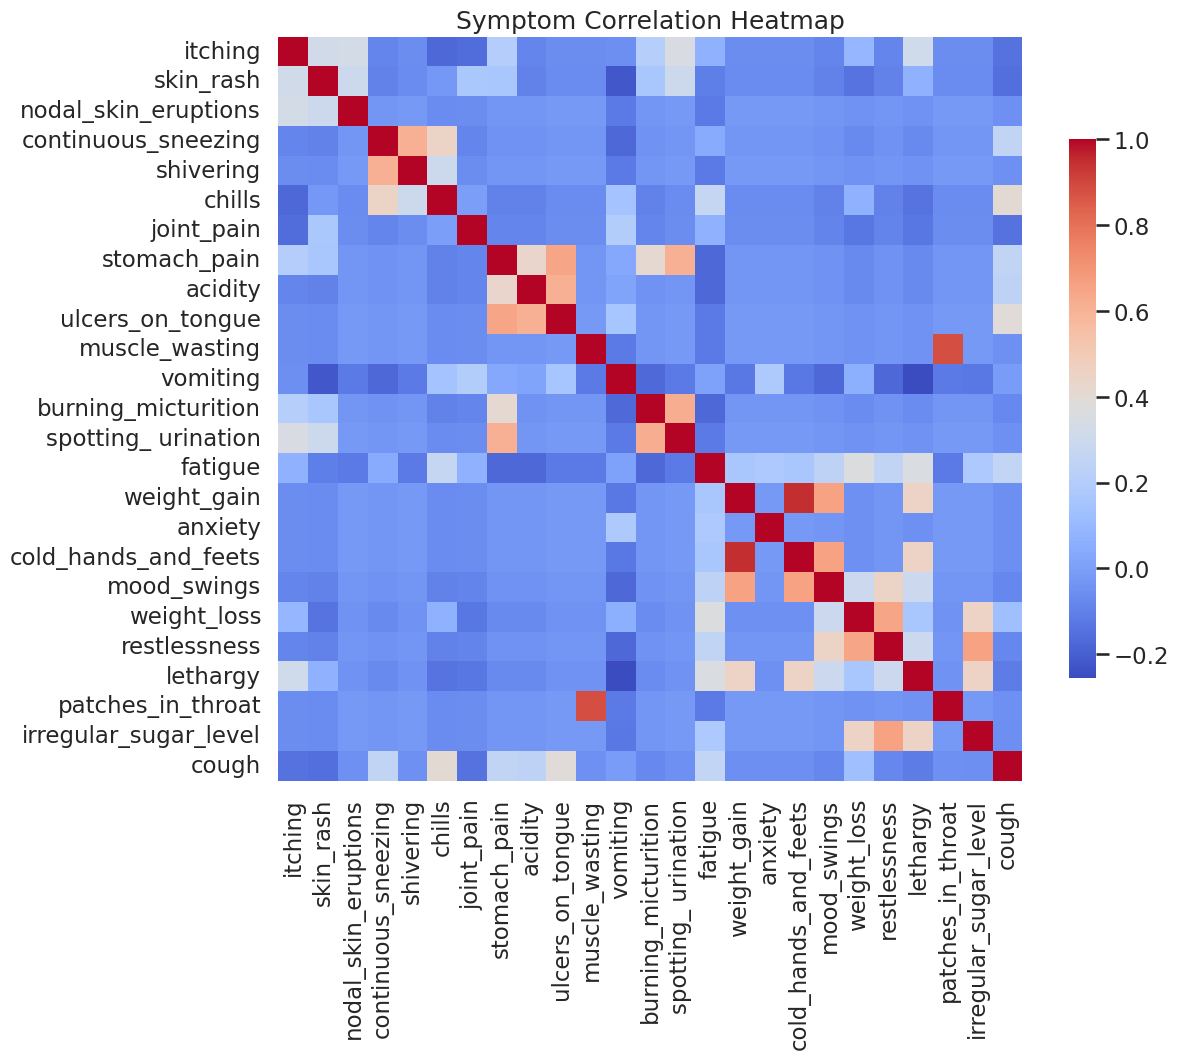

In [70]:
plt.figure(figsize=(12, 10))
sample_corr = symptoms.iloc[:, :25].corr()

sns.heatmap(
    sample_corr,
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.7}
)
plt.title("Symptom Correlation Heatmap")
plt.show()


/tmp/ipython-input-3404315052.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["symptom_total"] = symptom_count


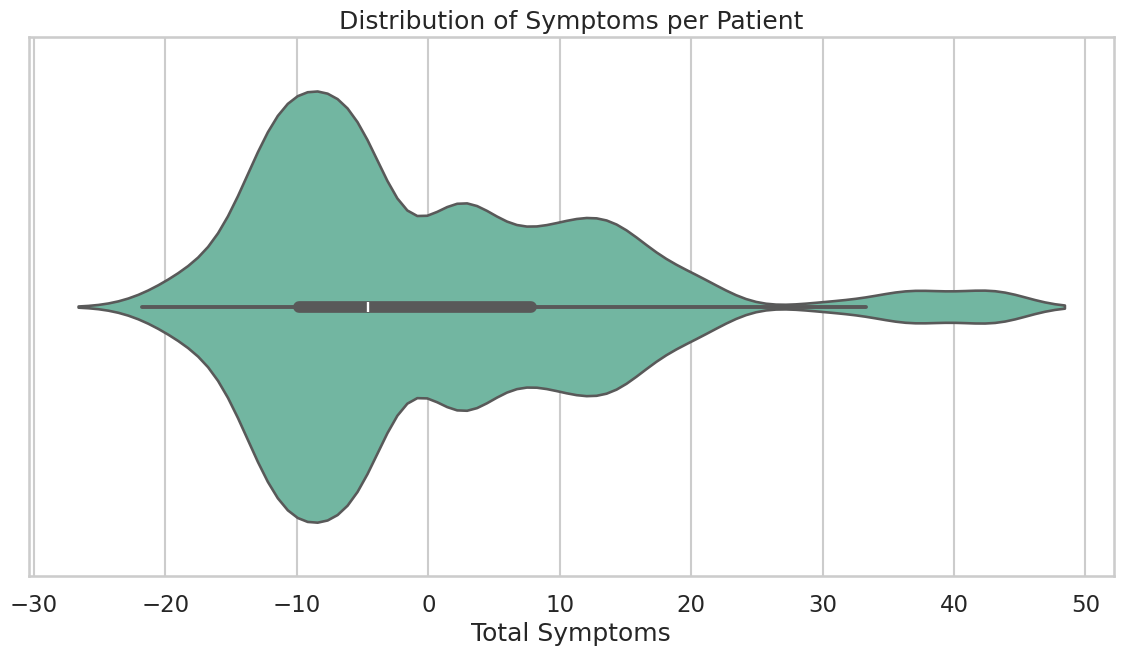

In [71]:
df["symptom_total"] = symptom_count

plt.figure()
sns.violinplot(x="symptom_total", data=df)
plt.title("Distribution of Symptoms per Patient")
plt.xlabel("Total Symptoms")
plt.show()


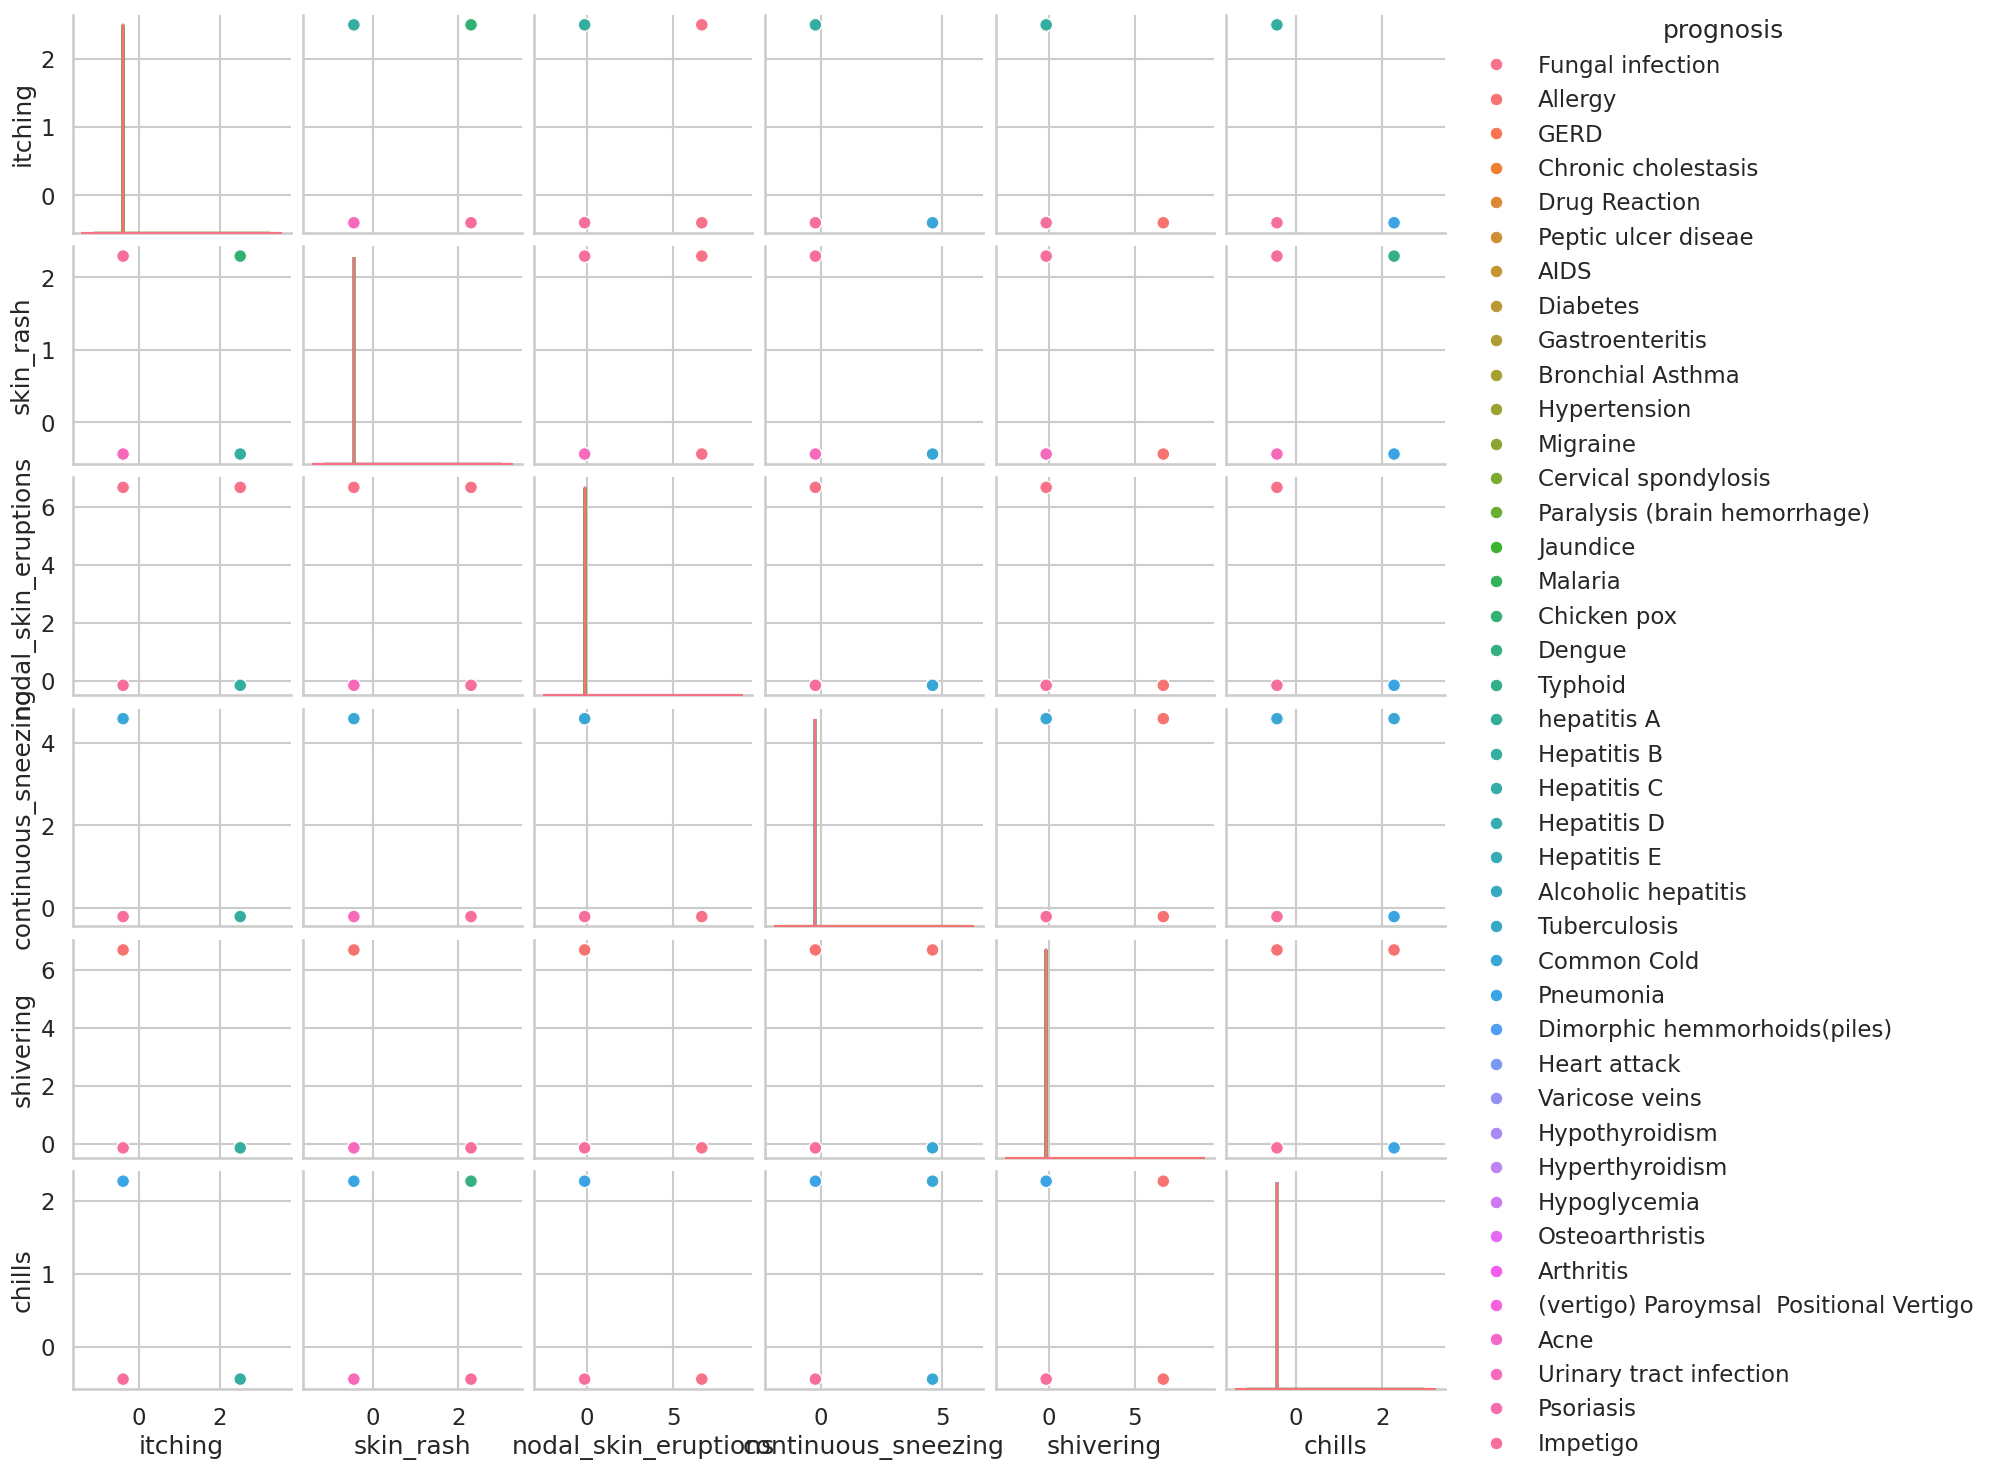

In [72]:
sample_df = df.iloc[:, :6]
sample_df["prognosis"] = df["prognosis"]

sns.pairplot(sample_df, hue="prognosis")
plt.show()


In [73]:

symptoms = df.drop("prognosis", axis=1)

avg_symptoms = symptoms.groupby(df["prognosis"]).mean().sum(axis=1)

avg_symptoms = avg_symptoms.sort_values(ascending=False)


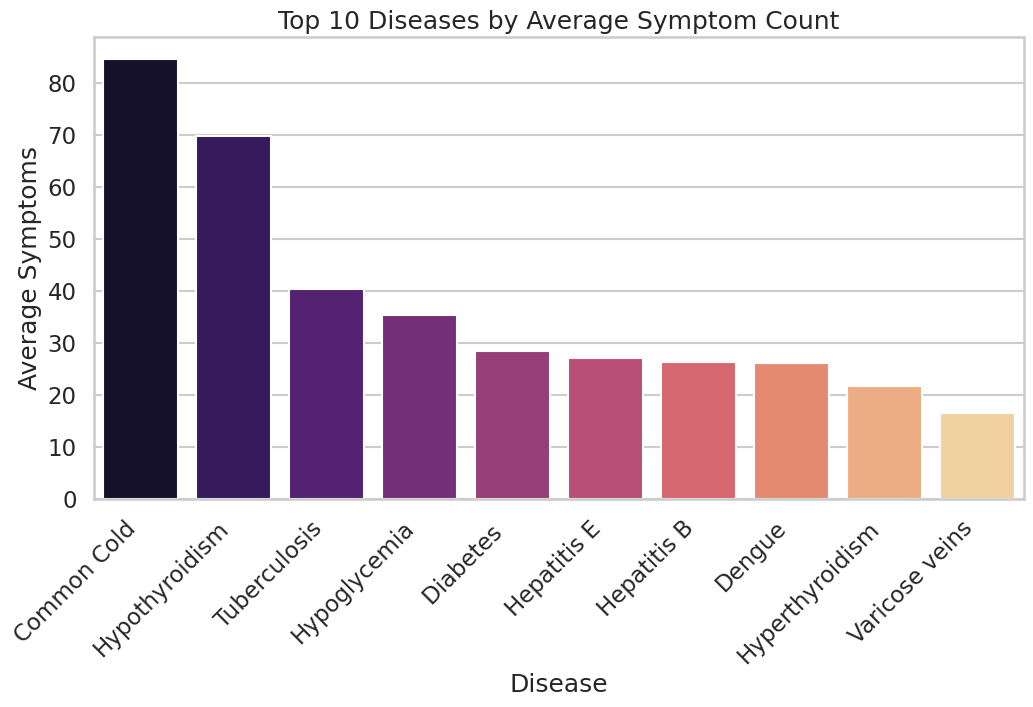

In [74]:
top10 = avg_symptoms.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top10.index,
    y=top10.values,
    hue=top10.index,
    palette="magma",
    legend=False
)

plt.title("Top 10 Diseases by Average Symptom Count")
plt.xlabel("Disease")
plt.ylabel("Average Symptoms")
plt.xticks(rotation=45, ha="right")
plt.show()
